In [48]:
import numpy as np
import pandas as pd
import os
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
fileName = pd.read_csv("data/projeto/auto-mpg.csv", na_values='?')

In [50]:
df = fileName

In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<h1>Tratamendo dos Dados</h1>

Verificando campos vazios

In [53]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Excluindo campos vazios

In [54]:
df = df.dropna(axis=0)

A medida de consumo dos carros está  em Miles Per Gallon (*mpg*), vamos converter os valores dessa coluna para km/l criando uma nova coluna de nome `kml` com um cálculo simples, multiplicando o valor em *mpg* por `0.42514` o convertemos para km/l. Por fim, excluímos a coluna *mpg* já que não terá mais uso.

In [55]:
print("-------- Coluna 'mpg' -------\n", df['mpg'])
df['kml'] = df['mpg'] * 0.42514
print("\n\n-------- Coluna 'kml' ---------")
print(df['kml'])
df = df.drop('mpg', axis=1)

-------- Coluna 'mpg' -------
 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64


-------- Coluna 'kml' ---------
0       7.65252
1       6.37710
2       7.65252
3       6.80224
4       7.22738
         ...   
393    11.47878
394    18.70616
395    13.60448
396    11.90392
397    13.17934
Name: kml, Length: 392, dtype: float64


/tmp/ipykernel_8/933148675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kml'] = df['mpg'] * 0.42514


O campo `weight` que contém os valores de peso dos carros está em libras ( pounds ), convertendo para kg,temos:

In [56]:
df['weight'] = round(df['weight'] / 2.205, 2)
print("\n\n-------- Coluna 'weight' ---------")
print(df['weight'])



-------- Coluna 'weight' ---------
0      1589.12
1      1674.83
2      1558.28
3      1556.92
4      1564.17
        ...   
393    1265.31
394     965.99
395    1040.82
396    1190.48
397    1233.56
Name: weight, Length: 392, dtype: float64


A variável "displacement" está em polegadas cúbicas, com o intuito de deixar os dados mais próxima da realidade brasileira, vamos convertê-las de in³ (polegadas cúbicas) para cm³ (centímetros cúbicos).

Fórmula de conversão:
`cm³ = in³ × 16.3871`

In [57]:
df['displacement'] = df['displacement'] * 16.3871
df['displacement']

0      5030.8397
1      5735.4850
2      5211.0978
3      4981.6784
4      4948.9042
         ...    
393    2294.1940
394    1589.5487
395    2212.2585
396    1966.4520
397    1950.0649
Name: displacement, Length: 392, dtype: float64

A coluna 'acceleration' atualmente considera a distância em milhas. Vamos convertê-la para que os valores sejam representados em quilômetros.

Formula de conversão: `acceleration (0 a 100 km/h) = acceleration (0 a 60 mph) × 1,04`

In [58]:
df['acceleration'] = df['acceleration'] * 1.04
df['acceleration']

0      12.480
1      11.960
2      11.440
3      12.480
4      10.920
        ...  
393    16.224
394    25.584
395    12.064
396    19.344
397    20.176
Name: acceleration, Length: 392, dtype: float64

In [59]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kml
0,8,5030.8397,130.0,1589.12,12.48,70,1,chevrolet chevelle malibu,7.65252
1,8,5735.4850,165.0,1674.83,11.96,70,1,buick skylark 320,6.37710
2,8,5211.0978,150.0,1558.28,11.44,70,1,plymouth satellite,7.65252
3,8,4981.6784,150.0,1556.92,12.48,70,1,amc rebel sst,6.80224
4,8,4948.9042,140.0,1564.17,10.92,70,1,ford torino,7.22738


Alterando a posição da coluna `kml`, por ser nossa variável dependente, deixar ela na primeira posição facilita a visualização em posteriores gráficos e análises.

In [60]:
df.insert(0, 'kml', df.pop('kml'))
df

,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,7.65252,8,5030.8397,130.0,1589.12,12.480,70,1,chevrolet chevelle malibu
1,6.37710,8,5735.4850,165.0,1674.83,11.960,70,1,buick skylark 320
2,7.65252,8,5211.0978,150.0,1558.28,11.440,70,1,plymouth satellite
3,6.80224,8,4981.6784,150.0,1556.92,12.480,70,1,amc rebel sst
4,7.22738,8,4948.9042,140.0,1564.17,10.920,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,11.47878,4,2294.1940,86.0,1265.31,16.224,82,1,ford mustang gl
394,18.70616,4,1589.5487,52.0,965.99,25.584,82,2,vw pickup
395,13.60448,4,2212.2585,84.0,1040.82,12.064,82,1,dodge rampage
396,11.90392,4,1966.4520,79.0,1190.48,19.344,82,1,ford ranger


In [61]:
df_ohe = pd.get_dummies(df, columns=['car name', 'model year'])

In [62]:
df.head()

,kml,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,7.65252,8,5030.8397,130.0,1589.12,12.48,70,1,chevrolet chevelle malibu
1,6.37710,8,5735.4850,165.0,1674.83,11.96,70,1,buick skylark 320
2,7.65252,8,5211.0978,150.0,1558.28,11.44,70,1,plymouth satellite
3,6.80224,8,4981.6784,150.0,1556.92,12.48,70,1,amc rebel sst
4,7.22738,8,4948.9042,140.0,1564.17,10.92,70,1,ford torino


# EDA (Exploratory Data Analysis)

Nesta seção, vamos investigar os dados com o objetivo de entender melhor suas características, identificar padrões e detectar outliers.

Primeiramente, vamos plotar um *Heatmap* para identificar possíveis correlações entre variáveis.


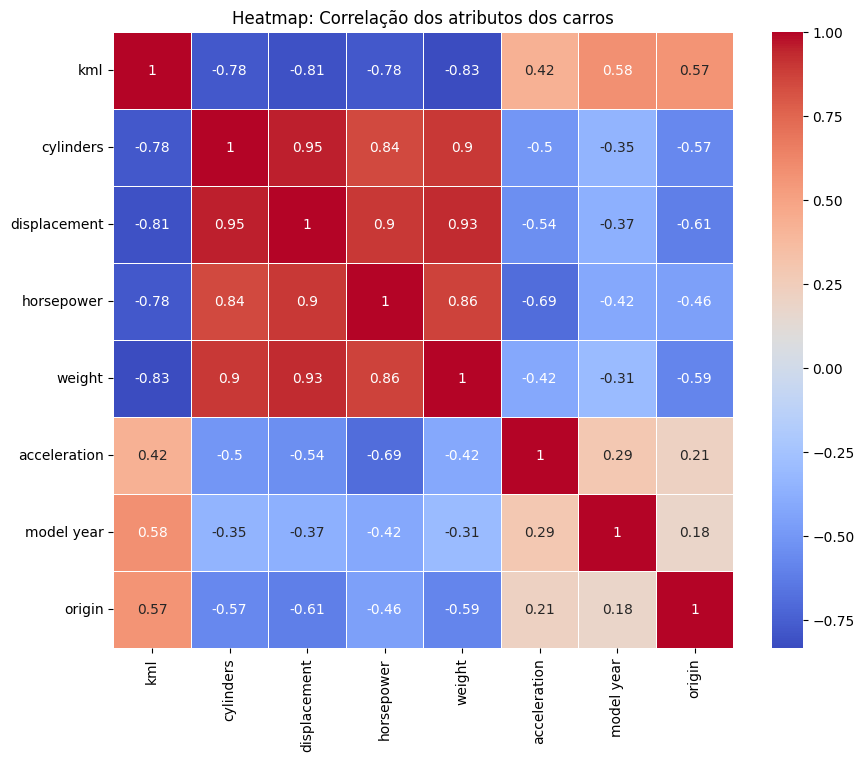

In [63]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.dropna()

correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap: Correlação dos atributos dos carros')
plt.show()

Analisando o gráfico, é notória a correlação negativa da nossa variável dependente (`kml`) com 4 outras variáveis: `cylinders`, `displacement`, `horsepower` e `weight`. Que se tratam, respectivamente, dos cilindros, cilindradas, cavalos de potência e peso do carro.

Isso quer dizer que, quanto maior o valor dessas 4 variáveis menor vai ser a economia do carro (menos quilômetros o carro percorre com 1 litro de combustível).

E faz sentido ao analisarmos como cada uma dessas características afeta o funcionamento de um carro:

1. **Cilindros**: Mais cilindros aumentam a potência, mas também o consumo de combustível, já que exigem mais energia.
2. **Cilindrada**: Motores com maior cilindrada queimam mais combustível por ciclo, resultando em menor eficiência.
3. **Cavalos de Potência (HP)**: Mais potência oferece melhor desempenho, mas consome mais combustível.
4. **Peso**: Carros mais pesados requerem mais combustível para se mover, diminuindo a economia.

Esses fatores juntos influenciam diretamente a eficiência de combustível de um carro.

In [64]:
df.nunique() # Ajuda na análise da diversidade dos dados

kml             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

Vamos realizar a contagem de algumas variáveis para ver quais valores se repetem determinando a diversidade dos dados.

/tmp/ipykernel_8/3596059153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='origin', y='kml', data=avg_consumption_by_origin, palette='viridis')


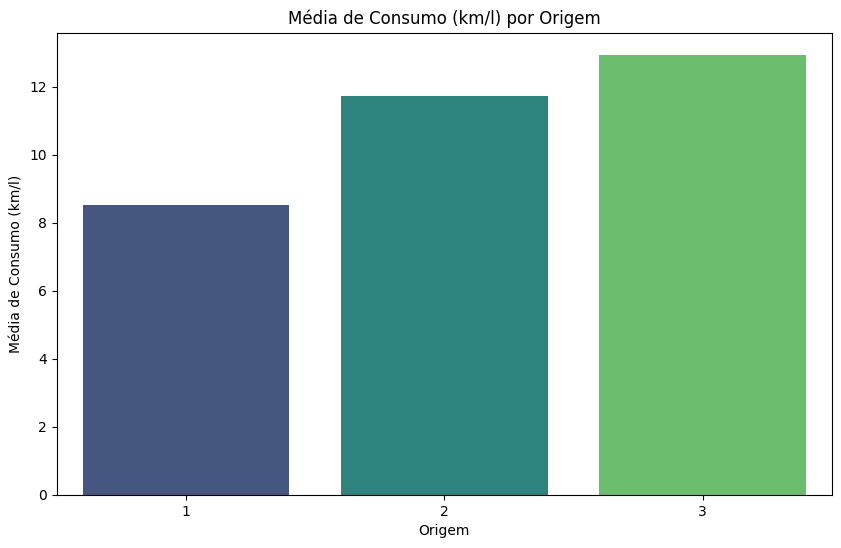

In [65]:
# 1. Agrupar por 'origin' e calcular a média do consumo
avg_consumption_by_origin = df.groupby('origin')['kml'].mean().reset_index()

# 2. Visualizar os dados usando um barplot para comparar o consumo entre as origens
plt.figure(figsize=(10,6))
sns.barplot(x='origin', y='kml', data=avg_consumption_by_origin, palette='viridis')

plt.title('Média de Consumo (km/l) por Origem')
plt.xlabel('Origem')
plt.ylabel('Média de Consumo (km/l)')
plt.show()

Isso mostra que os carros do Japão tendem a ser mais econômicos que os carros dos EUA e Europa

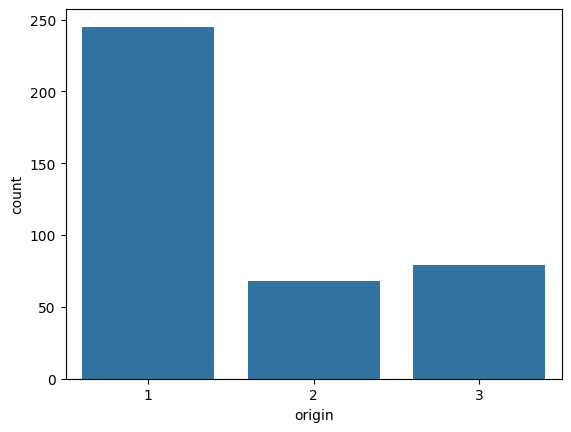

In [66]:
sns.countplot(x = "origin", data = df)
plt.show()

Este gráfico demonstra que a maior parte dos carros na base de dados é proveniente dos EUA, o que pode resultar em underfitting do modelo devido à falta de diversidade nos dados.

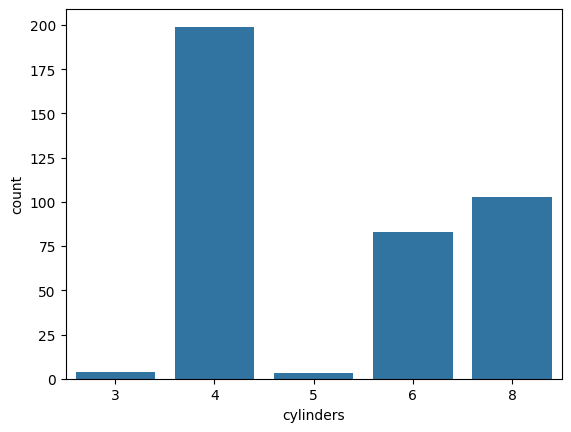

In [67]:
sns.countplot(x = "cylinders", data = df)
plt.show()

Podemos notar que a maioria dos carros da base de dados tem 4 cilindros, o que nos indica, que a maior parte dos carros são mais econômicos.

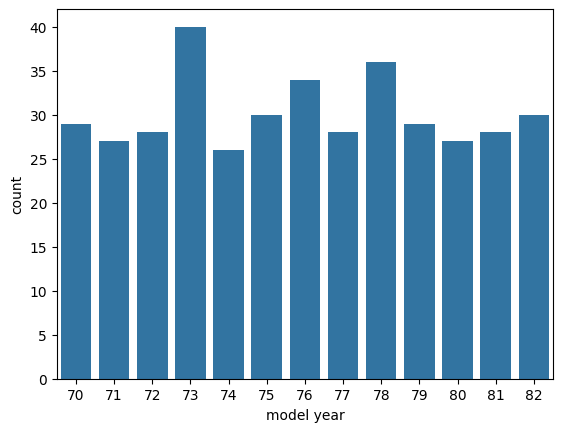

In [68]:
sns.countplot(x = "model year",data = df)
plt.show()

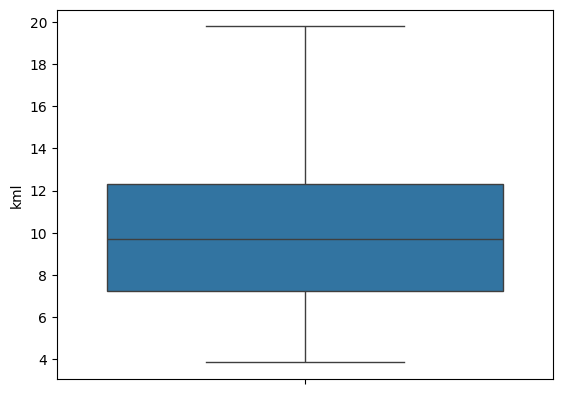

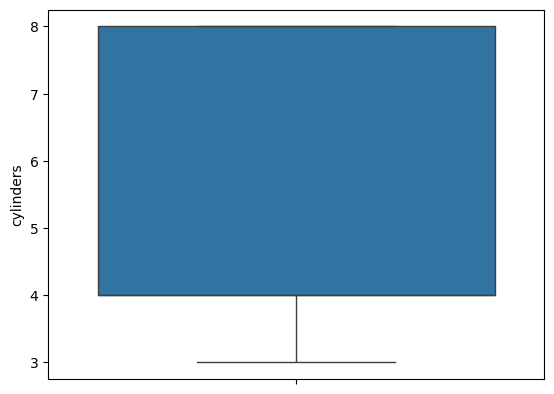

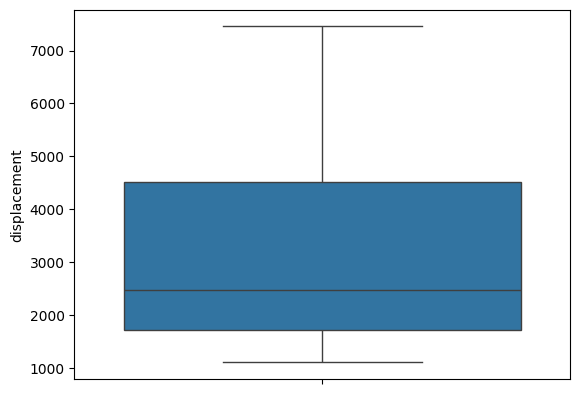

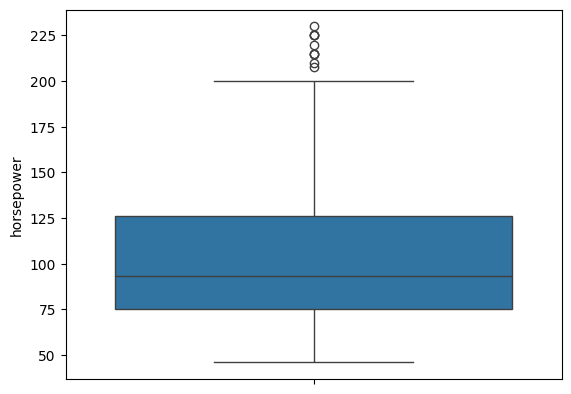

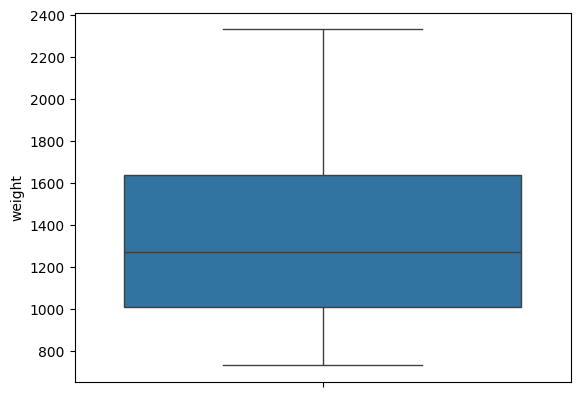

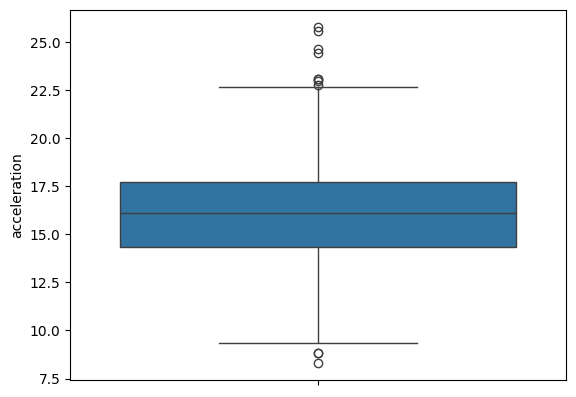

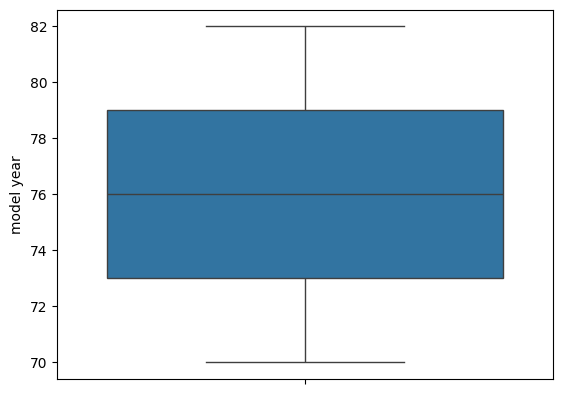

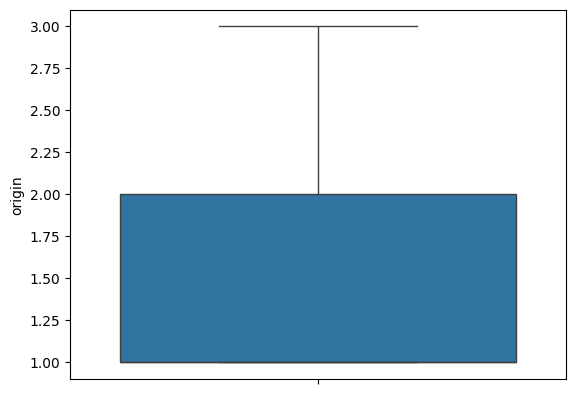

In [69]:
for i in df.select_dtypes(np.number).columns:

    plt.figure()
    sns.boxplot(y = i, data = df)

As colunas `acceleration` e `horsepower` tem outliers.

<h1>Detecção e remoção de Outliers</h1>

In [70]:
def outliner_extractor(column):

    top = df[column].quantile(0.99)
    print("Maximo de {} é {:.2f}".format(column,top))

    bottom = df[column].quantile(0.01)
    print("Mínimo de {} é {:.2f}".format(column,bottom))

    filter = ((df[column] < top) & (df[column] > bottom))
    print("{} Outliner extraidos de {}".format(filter.value_counts().loc[False],column))

    print()

    return filter

In [71]:
df = df[outliner_extractor("horsepower")]
df = df[outliner_extractor("acceleration")]

Maximo de horsepower é 220.45
Mínimo de horsepower é 48.00
9 Outliner extraidos de horsepower

Maximo de acceleration é 23.09
Mínimo de acceleration é 9.79
9 Outliner extraidos de acceleration



# Treino e Teste dos Modelos

## Preparação dos dados para Treino e Teste

Vamos padronizar os dados das colunas selecionadas, o que é útil pois ajuda a garantir que cada variável contribua de maneira igual ao modelo, evitando que variáveis com escalas maiores dominem o aprendizado.

In [72]:
sc = StandardScaler()
cols = ['cylinders','displacement','horsepower','weight','acceleration', 'origin']
df_ohe[cols]= sc.fit_transform(df_ohe[cols])
df_ohe.head()

,kml,cylinders,displacement,horsepower,weight,acceleration,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,7.65252,1.483947,1.077290,0.664133,0.620551,-1.285258,-0.716641,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.37710,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.716641,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7.65252,1.483947,1.182542,1.184397,0.540390,-1.648189,-0.716641,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.80224,1.483947,1.048584,1.184397,0.536855,-1.285258,-0.716641,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.22738,1.483947,1.029447,0.924265,0.555700,-1.829655,-0.716641,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Preparando os dados para os modelos de machine learning, separando as variáveis independentes (features) da variável dependente (target), que no caso, é a variável `kml`.


- `y` contém a variável que desejamos prever (quilometragem por litro).
- `X` contém todas as outras variáveis que serão usadas como entradas para o modelo.

In [73]:
y = df_ohe['kml']
X= df_ohe.drop('kml',axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,car name_amc concord,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,1.483947,1.077290,0.664133,0.620551,-1.285258,-0.716641,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.716641,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.483947,1.182542,1.184397,0.540390,-1.648189,-0.716641,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.483947,1.048584,1.184397,0.536855,-1.285258,-0.716641,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.483947,1.029447,0.924265,0.555700,-1.829655,-0.716641,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Aqui é realizada a divisão do conjunto de dados em partes de treinamento e teste, permitindo que seja feito o treino do modelo em uma parte dos dados e teste sua performance em dados não vistos, o que é essencial para avaliar a generalização do modelo.

In [74]:
x_train, x_test, y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

## Treino e Avaliação dos Modelos

Treino dos 4 modelos que iremos utilizar para realizar as regressões. Sendo eles:

- Árvore de Decisão
- Máquinas de Vetores de Suporte (SVR)
- *Gradient Boosting Regression*
- *Random Forest Regression*

Neste primeiro caso, estamos treinando um modelo de regressão usando uma árvore de decisão.

In [75]:
# Define model. I specify a number for random_state to ensure same results each run
df_model = DecisionTreeRegressor(random_state=1)

# Fit model
df_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

Treinando um modelo de regressão com SVR para prever valores.

In [76]:
# Define model. I specify a number for random_state to ensure same results each run
df_model2 = SVR()

# Fit model
df_model2.fit(x_train, y_train)

SVR()

Treinando um modelo de regressão por Gradient Boosting para prever valores.

In [77]:
# Define model. I specify a number for random_state to ensure same results each run
df_model3 = GradientBoostingRegressor(random_state=1)

# Fit model
df_model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

E por fim, treinando um modelo de regressão por Random Forest para prever valores.

In [78]:
# Define model. I specify a number for random_state to ensure same results each run
df_model4 = RandomForestRegressor(random_state=1)

# Fit model
df_model4.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

## Testando os Modelos

In [79]:
print("Fazendo predições para os 5 primeiros carros usando Decision Tree Regression:")
print(df_model.predict(x_test.head()))

Fazendo predições para os 5 primeiros carros usando Decision Tree Regression:
[12.711686 10.6285   12.54163  13.519452 10.118332]


In [80]:
print("Fazendo predições para os 5 primeiros carros usando  SVR:")
print(df_model2.predict(x_test.head()))

Fazendo predições para os 5 primeiros carros usando  SVR:
[12.6186999  10.0364547  13.79548298 11.62626295 11.80327595]


In [81]:
print("Fazendo predições para os 5 primeiros carros usando  Gradient Boosting Regressor:")
print(df_model3.predict(x_test.head()))

Fazendo predições para os 5 primeiros carros usando  Gradient Boosting Regressor:
[12.76527497 10.17195271 14.41416383 13.33828956 11.77758246]


In [82]:
print("Fazendo predições para os 5 primeiros carros usando  Random Forest Regressor:")
print(df_model4.predict(x_test.head()))

Fazendo predições para os 5 primeiros carros usando  Random Forest Regressor:
[12.95103982  9.9525274  14.5206567  13.11641928 11.3023469 ]


# Avaliando os Modelos

Vamos usar 3 algoritmos para avaliar os modelos, sendo eles:

- R²
- MSE
- RMSE

In [83]:
models = {
    'Decision Tree': df_model,
    'SVR': df_model2,
    'Gradient Boosting': df_model3,
    'Random Forest': df_model4
}

# Avaliando cada modelo

r2Scores = []

print("Avaliando cada modelo com R²:")

for name, model in models.items():
    y_pred = model.predict(x_test)
    r2Score = r2_score(y_test, y_pred)
    print(f"{name} = {r2Score}")
    r2Scores.append(r2Score)


mseScores = []

print("\nAvaliando cada modelo com MSE:")

for name, model in models.items():
    y_pred = model.predict(x_test)
    mseScore = mean_squared_error(y_test, y_pred)
    print(f"{name} = {mseScore}")
    mseScores.append(mseScore)


rmseScores = np.sqrt(mseScores)

print("\nAvaliando cada modelo com RMSE:")

for i in range(len(models)):
    print(f"{list(models.keys())[i]} = {rmseScores[i]}")


Avaliando cada modelo com R²:
Decision Tree = 0.626406221651528
SVR = 0.8155713397104413
Gradient Boosting = 0.7510791794762253
Random Forest = 0.7611798962257147

Avaliando cada modelo com MSE:
Decision Tree = 3.5723902301042036
SVR = 1.7635495619926496
Gradient Boosting = 2.380238534056122
Random Forest = 2.283653141246747

Avaliando cada modelo com RMSE:
Decision Tree = 1.8900767788913242
SVR = 1.3279870338194757
Gradient Boosting = 1.5428021694488643
Random Forest = 1.511176078836198


Vamos visualizar melhor os resultados de cada algoritmo que avaliaram o modelo com alguns gráficos.

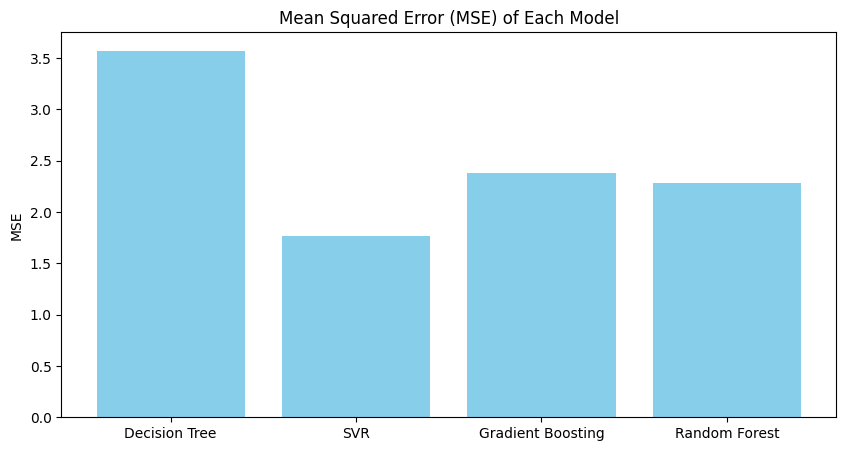

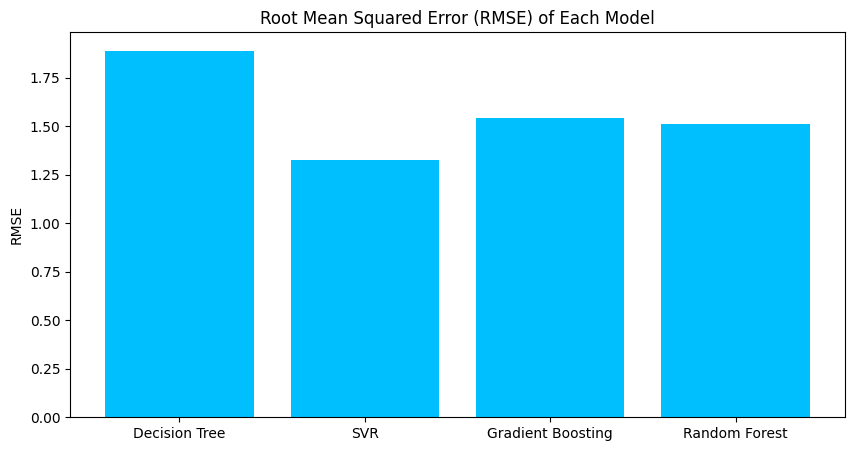

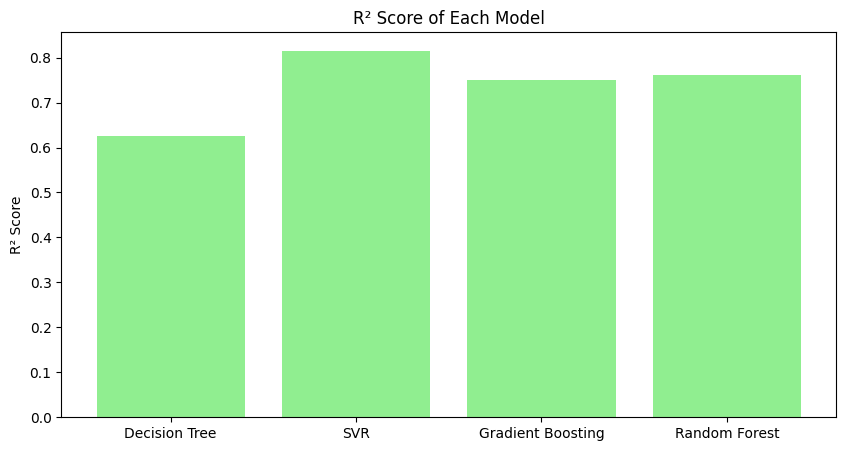

In [84]:
# Supondo que 'y_test' sejam os valores reais e que temos previsões de cada modelo
mse_scores = []
rmse_scores = []
r2_scores = []
model_names = ['Decision Tree', 'SVR', 'Gradient Boosting', 'Random Forest']

# Coletar métricas de desempenho
for model in models.values():
    predictions = model.predict(x_test)
    mse_scores.append(mean_squared_error(y_test, predictions))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, predictions)))
    r2_scores.append(r2_score(y_test, predictions))

# Bar plot for MSE
plt.figure(figsize=(10,5))
plt.bar(model_names, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE) of Each Model')
plt.ylabel('MSE')
plt.show()

# Bar plot for RMSE
plt.figure(figsize=(10,5))
plt.bar(model_names, rmse_scores, color='deepskyblue')
plt.title('Root Mean Squared Error (RMSE) of Each Model')
plt.ylabel('RMSE')
plt.show()

# Bar plot for R² Score
plt.figure(figsize=(10,5))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title('R² Score of Each Model')
plt.ylabel('R² Score')
plt.show()



O **SVR** se destacou como o modelo mais preciso nas análises realizadas. No entanto, ***Gradient Boosting*** e ***Random Forest*** também apresentaram bons resultados e podem ser boas alternativas dependendo das suas necessidades. A **Árvore de Decisão** apresentou o pior desempenho geral.



| Modelo | RMSE | MSE | R² | Conclusão |
|---|---|---|---|---|
| Árvore de Decisão | Alto | Alto | Baixo | Pior desempenho geral |
| SVR | Baixo | Baixo | Alto | Melhor desempenho geral |
| Gradient Boosting | Médio | Médio | Alto | Bom desempenho, especialmente em R² |
| Random Forest | Médio | Médio | Alto | Bom desempenho, similar ao Gradient Boosting |

Utilizando o gráfico de dispersão para visualizar como as previsões de cada modelo se comparam aos valores reais. Quanto mais próximos os pontos estiverem da linha diagonal vermelha, melhor será o desempenho do modelo.

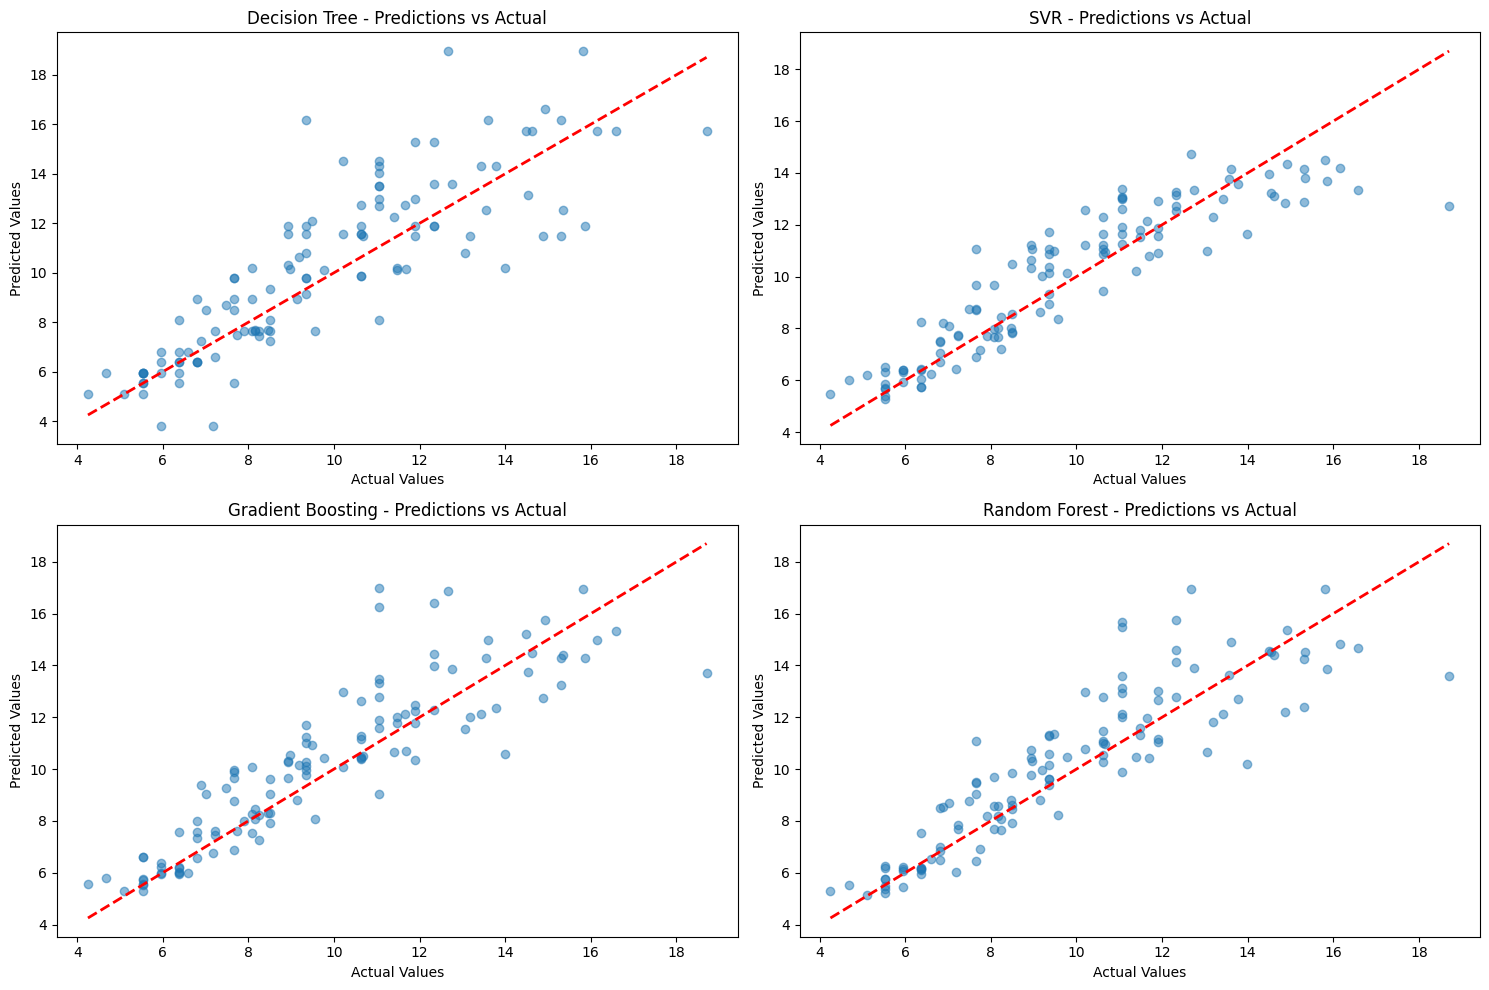

In [85]:
# Prediction vs Actual plot for each model
plt.figure(figsize=(15,10))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    predictions = model.predict(x_test)
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name} - Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()




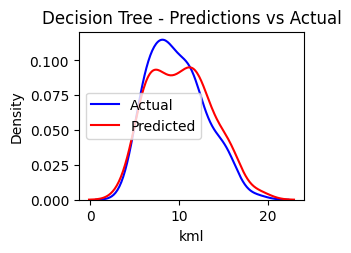

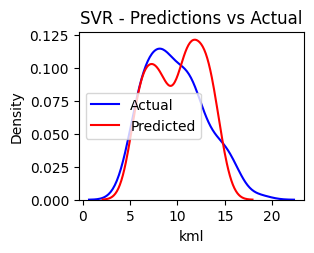

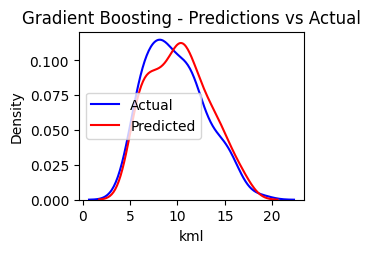

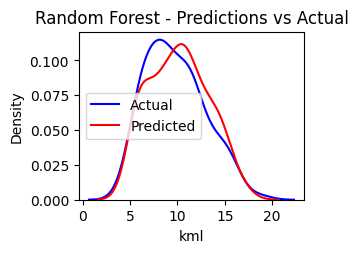

In [86]:
from sklearn.metrics import roc_curve

for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    predictions = model.predict(x_test)
    sns.kdeplot(y_test, label="Actual", color='blue')
    sns.kdeplot(predictions, label="Predicted", color='red')
    plt.title(f'{name} - Predictions vs Actual')
    plt.legend()
    plt.show()